# Assignment 1: Introduction to Data Science and Python


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import seaborn as sns

## Contributors:
### Lukas Andersson - X Hours
###

## 1.

### a.
In this first assignment we manipulate given data to later print it out as a scatter plot. By looking at the data you quickly realize that the life expectancy data have way more entires than the given GDP data. This has two reasons, firstly because every country has data from several years, not just 2015, in the life expectancy table. And secondly because they do not have the same set of countries to begin with. To solve this we first remove every single entry that does not have data from the year of 2015, since thats the only data we have on GDP. Then we loop through all those entries and make sure to only keep the ones where the country exists in both data sets. When we filterd out all data we do not want, we simply plot out the results. The first graph includes all data and the second one excludes the entry far right.  

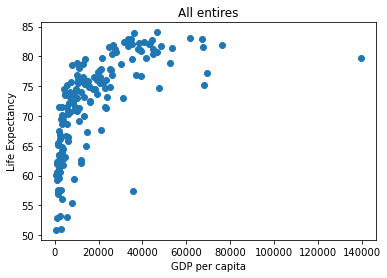

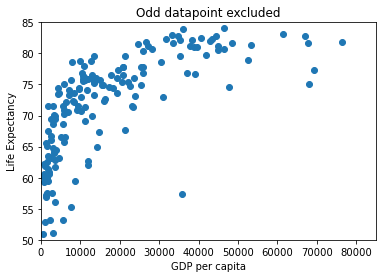

In [2]:
x = []
y = []

df1 = pd.read_csv('../data/GDP-2015.csv')
df2 = pd.read_csv('../data/life-expectancy.csv')

for index2, row2 in df2.iterrows():
    if row2['Year'] == 2015:
        for index1, row1 in df1.iterrows():
            if row2['Entity'] == row1['Entity']:
                x.append(row1['GDP per capita'])
                y.append(row2['Life expectancy (years)'])

plt.scatter(x, y)
plt.title('All entires')
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.show()

plt.scatter(x, y)
plt.title('Odd datapoint excluded')
plt.xlim([0, 85000])
plt.ylim([50, 85])
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.show()

### b.
When looking at the result we clearly see that when the GDP per capita goes up, (X axis), the life expectancy generally also goes up. There are some countries with high life expectancy even tho the GDP is low, but not the other way around. There is in our data set only one country that has a low life expectancy while the GDP is relatively high. This one data point is the only thing contradicting the correlation between GDP and life expectancy so we would draw the conclusion that high GDP in fact does contribute to higher life expectancy. The second graph that excludes the entry far to the right simply is a zoomed in version to make the correaltion more visible.

This result seems very reasonable since higher life expectancy is what you would think will happen if you have a higher GDP per capita, very resonable.

### c.
No, nothing was removed from the data however we made two plots, where one datapoint is not included in the second one. The reason for this is becuase that datapoint is so extreme compared to the other data, so it is more visually pleasing not not include it and easier see the correlation.

### d.
Below is a list with all countries that have life expectancy higher than one standar deviation above the mean.

In [3]:
countries_LE_above_OneSD = []

data = np.column_stack((x, y))

one_sd_above_mean = (data.mean(axis=0)  + data.std(axis=0))[1]
for index, row in df2.iterrows():
    if row['Year'] == 2015:
        if(row['Life expectancy (years)'] >  one_sd_above_mean):
            countries_LE_above_OneSD.append(row['Entity'])
dfd = pd.DataFrame(countries_LE_above_OneSD)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dfd)

                             0
0                      Andorra
1                     Anguilla
2                    Australia
3                      Austria
4                      Belgium
5                      Bermuda
6                       Canada
7               Cayman Islands
8              Channel Islands
9                       Cyprus
10                     Denmark
11              Faeroe Islands
12            Falkland Islands
13                     Finland
14                      France
15                     Germany
16                      Greece
17                  Guadeloupe
18                   Hong Kong
19                     Iceland
20                     Ireland
21                 Isle of Man
22                      Israel
23                       Italy
24                       Japan
25               Liechtenstein
26                  Luxembourg
27                       Macao
28                       Malta
29                  Martinique
30                      Monaco
31      

### e.
Every country in the top left of the graph, theese countries are also printed in the list below the graph to name some exampels.

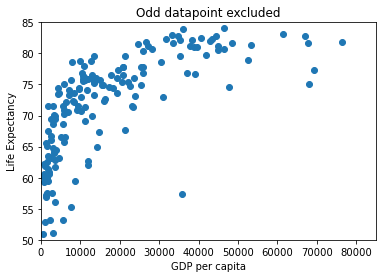

                         0
0                  Albania
1                  Algeria
2                  Armenia
3               Azerbaijan
4                 Barbados
5   Bosnia and Herzegovina
6                   Brazil
7                 Bulgaria
8               Cape Verde
9                    China
10                Colombia
11              Costa Rica
12                    Cuba
13                Dominica
14      Dominican Republic
15                 Ecuador
16             El Salvador
17                 Georgia
18               Guatemala
19                Honduras
20                    Iran
21                 Jamaica
22                  Jordan
23                 Lebanon
24                   Libya
25               Macedonia
26                  Mexico
27              Montenegro
28                 Morocco
29               Nicaragua
30               Palestine
31                Paraguay
32                    Peru
33             Saint Lucia
34                  Serbia
35               Sri Lanka
3

In [4]:
mean = data.mean(axis=0)
countries_lowGDP_highLE = []

for index2, row2 in df2.iterrows():
    if row2['Year'] == 2015:
        for index1, row1 in df1.iterrows():
            if row2['Entity'] == row1['Entity']:
                if(row1['GDP per capita'] < mean[0]) and row2['Life expectancy (years)'] >  mean[1]:
                    countries_lowGDP_highLE.append(row1['Entity'])

plt.scatter(x, y)
plt.title('Odd datapoint excluded')
plt.xlim([0, 85000])
plt.ylim([50, 85])
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.show()   
                    
dfd = pd.DataFrame(countries_lowGDP_highLE)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dfd)

### f.
There seems to be an upgoing trend for countries with high GDP, however, there are several countries with quite low life expectancy even though they have quite high GDP. The average life expectancy is 72 years in our data, if you look at the graph below you can see that even ones very far right (High GDP) are below average life expectancy. So it depends on what you classify as low life expectancy, if below average is considerd low there is for sure countries with high GDP and low life expectancy.

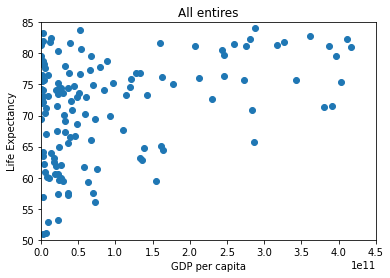

In [5]:
x1 = []
y1 = []

df3 = pd.read_csv('../data/national-gdp.csv')

for index2, row2 in df2.iterrows():
    if row2['Year'] == 2015:
        for index3, row3 in df3.iterrows():
            if row3['Year'] == 2015 and row3["Entity"] == row2["Entity"]:
                x1.append(row3["Total output-side real GDP at chained PPPs (tot_rgdp_o) (PWT 9.1 (2019))"])
                y1.append(row2['Life expectancy (years)'])
                
plt.scatter(x1, y1)
plt.title('All entires')
plt.xlim([0, 450000000000])
plt.ylim([50, 85])
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.show()

### g.
If we would use GDP per capita instead we could use the graph we made earlier in question A.
We can see on this graph that every single data point quickly gets above the average life
expectancy (72 Years). There is only one exception to this which is Equatorial Guinea,
that stands out a lot on the graph being extremely low life expectancy despite having quite
high GDP per capita. This is however just one extreme data point and should not be the base of
any conclusions, the vast majority of the data suggests that high GDP per capita actually
seem to imply that the life expectancy is not low in that specific country.

This means that GDP per capita seems to be a better indicator than just GDP if you want to see
 a correalation between GDP and life expectancy. This is quite reasonable too since the GDP
 of a country says nothing about what the majority of peoples living standards are. You need
 to relate the GDP to the population to get any info about how the living standards could be.

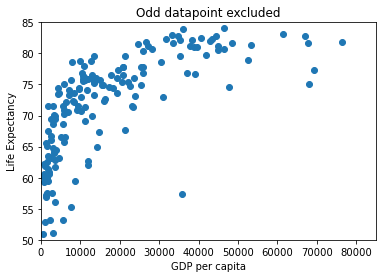

In [6]:
plt.scatter(x, y)
plt.title('Odd datapoint excluded')
plt.xlim([0, 85000])
plt.ylim([50, 85])
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.show()

## 2.
We have chosen two datasets for this analysis. One being a survey based on the share of people who say they are happy
across the world recorded and percentage of unemployment across the world recorded overtime. The happiness percentages were recorded
from different years in different countries. We have hence chosen to pick data from 2004 to 2014 to make a fair analysis.


We make a few assumptions while working with these data:

- The sample size of population based on which the survey for share of people who say they
 were happy and unemployment rates were the same every year.
- The data collected satisfies common assumptions [reference?]: normality, random samples, statistical independence
- The data is correct and accurate

### a.
COMMENT : Use different graphs like Violin or heat Map or bar graph




Visualisation of unemployement over years.

Visualisation of happiness over years.

We first analyse the data to see the correlation between percentages of unemployment and happiness.

** THE ANALYSIS HERE **

We then analyse if the reduced percentages of happiness is caused by increased rate of unemployment or
or vice versa


COMMENT : This involves constructing a hypothesis, conducting an experiment and then derive results.
Dont know if we would want to do that.


Are there countries having low unemployment rate and low happiness rates?

Are there countries having high unemployment rate and high happiness rates?

Global trends or national trends  

COMMENT: Below are some visuals, first row is unemployment 2004 and 2014. Second row is happiness 2004 and 2014. Third is the change in unemployment from 2004 to 2014 and fourth is the change in hapiness from 2004 to 2014. 5th&6th is them relative to eachother where the x axis is happiness and the y axis is unemploymentrate.  
  
With the data we have chosen there are several questions we would like answer. First of all we want to see how the trends are going globally, Is unemployment increasing or decreasing on a global scale? What about happiness? Is the trends looking similar at all between the two?. We also want to compare them with each other to find out if there is any condition in one of the data sets that implies the condition on the other. For example that would be if low employment implies that the country always is happy according to our data. Of course there are a lot of factors that needs to be considered, and you can't really draw any conclusions from it but that could mean that unemployment rates have impact on happiness.
  
Below are some graphs to now analyze the data. First we take a look at unemployment, on the first row there are two graphs showing the unemployment rates in 2004 and 2014, then right below there is a graph showing the change between the two. We then do the exact same thing for happiness to be able to see the data and the difference between the years. After that we have two scatter plots showing countries plotted with happiness rates on the x-axis and unemployment rates on the y-axis. This is to see the correlation, the first scatter plot shows 2004, and the second shows 2014. Lastly we have another graph that looks at one specific country, Germany in this case, over the years with data from both sets.

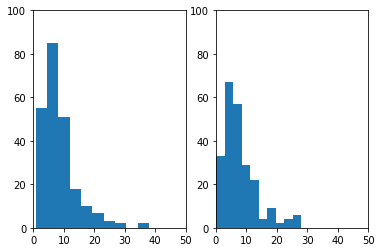

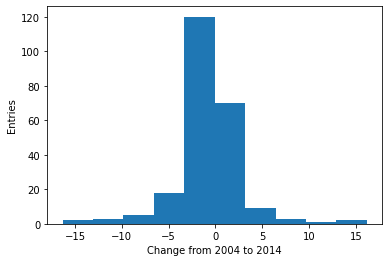

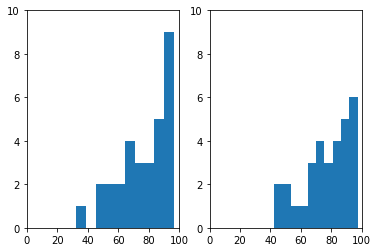

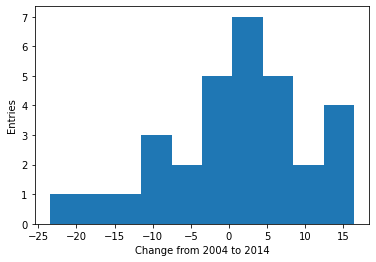

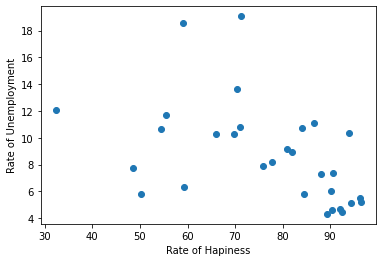

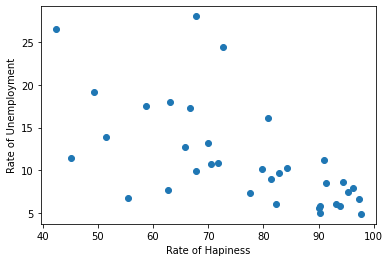

NameError: name 'sns' is not defined

In [9]:
histdata_unemployment = [[], [], []]
histdata_happiness = [[], [], []]
relative_data = [[[], []], [[], []]]

df4 = pd.read_csv('../data/share-of-people-who-say-they-are-happy-Eurobarometer.csv')
df5 = pd.read_csv('../data/unemployment-rate.csv')

for index5, row5 in df5.iterrows():
    if row5['Year'] == 2004:
        for index5i, row5i in df5.iterrows():
            if row5['Entity'] == row5i['Entity'] and row5i['Year'] == 2014:
                histdata_unemployment[0].append(row5['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
                histdata_unemployment[1].append(row5i['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
                histdata_unemployment[2].append(row5i['Unemployment, total (% of total labor force) (modeled ILO estimate)'] - row5['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
                
for index4, row4 in df4.iterrows():
    if row4['Year'] == 2004:
        for index4i, row4i in df4.iterrows():
            if row4['Entity'] == row4i['Entity'] and row4i['Year'] == 2014:
                histdata_happiness[0].append(row4['Share of people who are happy (Eurobarometer 2017)'])
                histdata_happiness[1].append(row4i['Share of people who are happy (Eurobarometer 2017)'])
                histdata_happiness[2].append(row4i['Share of people who are happy (Eurobarometer 2017)'] - row4['Share of people who are happy (Eurobarometer 2017)'])
                
for index4, row4 in df4.iterrows():
    if row4['Year'] == 2004:
        for index5, row5 in df5.iterrows():
            if row4['Entity'] == row5['Entity'] and row5['Year'] == 2004:
                relative_data[0][0].append(row4['Share of people who are happy (Eurobarometer 2017)'])
                relative_data[0][1].append(row5['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
                
    elif row4['Year'] == 2014:
        for index5, row5 in df5.iterrows():
            if row4['Entity'] == row5['Entity'] and row5['Year'] == 2014:    
                relative_data[1][0].append(row4['Share of people who are happy (Eurobarometer 2017)'])
                relative_data[1][1].append(row5['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
                      
relative2004 = np.column_stack((relative_data[0][0], relative_data[0][1]))
relative2014 = np.column_stack((relative_data[1][0], relative_data[1][1]))

fig, axs = plt.subplots(1, 2)
axs[0].hist(histdata_unemployment[0])
axs[1].hist(histdata_unemployment[1])
plt.setp(axs, xlim=(0, 50), ylim=(0, 100))
plt.show()

plt.hist(histdata_unemployment[2])
plt.ylabel('Entries')
plt.xlabel('Change from 2004 to 2014')
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].hist(histdata_happiness[0])
axs[1].hist(histdata_happiness[1])
plt.setp(axs, xlim=(0, 100), ylim=(0, 10))
plt.show()

plt.hist(histdata_happiness[2])
plt.ylabel('Entries')
plt.xlabel('Change from 2004 to 2014')
plt.show()

plt.scatter(relative_data[0][0], relative_data[0][1])
plt.ylabel('Rate of Unemployment')
plt.xlabel('Rate of Hapiness')
plt.show()

plt.scatter(relative_data[1][0], relative_data[1][1])
plt.ylabel('Rate of Unemployment')
plt.xlabel('Rate of Hapiness')
plt.show()

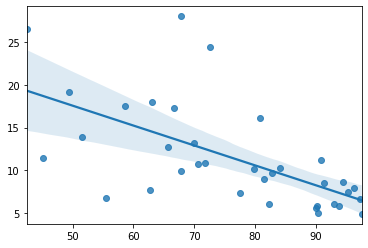

In [21]:
#regData = pd.DataFrame(data=relative_data[1], columns=["Rate of Unemployment","Rate of happiness"])
#sns.regplot(x = "Rate of Unemployment", y="Rate of happiness", data= regData)
sns.regplot(x = relative_data[1][0],y = relative_data[1][1]);

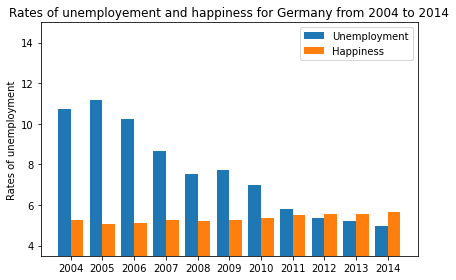

In [8]:
years = []
norm = colors.Normalize(0,20)
for n in range(2004,2015):
    years.append(n)

unemployment_rates = []
happiness_rates = []


for index6i in years:
    for index6, row6 in df5.iterrows():
        if  row6['Year'] == index6i and row6['Entity'] == "Germany":
               unemployment_rates.append(row6['Unemployment, total (% of total labor force) (modeled ILO estimate)'])

for index7i in years:
    for index7, row7 in df4.iterrows():
        if  row7['Year'] == index7i and row7['Entity'] == "Germany":
               happiness_rates.append(1.25 * norm(row7['Share of people who are happy (Eurobarometer 2017)']))


m = np.arange(len(years))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(m - width/2, unemployment_rates, width, label='Unemployment')
rects2 = ax.bar(m + width/2, happiness_rates, width, label='Happiness')
ax.set_ylim([3.5,15])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rates of unemployment')
ax.set_title('Rates of unemployement and happiness for Germany from 2004 to 2014')
ax.set_xticks(m)
ax.set_xticklabels(years)
ax.legend()



fig.tight_layout()

plt.show()

### b.

##### Conclusions derived from raw data :
TODO : The below points need to be justified or derived a conclusion from.
-
- The values of unemployement and share of people who are happy are represented in percentages.
- The happiness percentages were recorded from different years in different countries
- The recorded happiness percentages differ to a great amount in certain countries from one year to the next.

From plots 1, 2 we see that there is a decreasing trend in unemployment rates in both 2004 and 2014 globally. We see an
opposite trend in the case of percentage of people who are happy. So here we see globally people are increasingly happy during the
period when the unemployment rates are down.

TODO: Change in employment rates and happiness

We plot scatter plots between rates of happiness and unemployment in the years 2004 and also 2014 (Plots 7 and 8)
to see if there exists any correlation between them. We see a negative regression with a low confidence intervals
towards the bottom end of the regression. From this we can say that there is a negative correlation between
rate of happiness reported, and the rate of unemployment recorded.Which means, with increase of unemployment we see
a decrease in rate of happiness and vice versa on a global level.

On the Histogram plot we try to analyse the trend in employment and happiness rates in one country from 2004 to
2014. We see that while there is a dip in unemployment rates from 2004 to 2014, there seems to be a slight increase in
rate of happiness. Therefore, we can say that the correlation seems to exist on a national level too.
